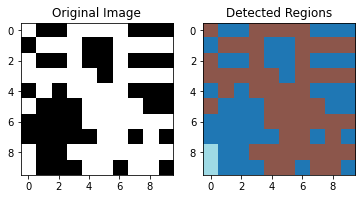

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def segment_image(img, low_threshold, high_threshold):
    h, w, _ = img.shape
    visited = np.zeros((h, w), dtype=np.uint8)
    regions = []

    def check_neighbors(x, y):
        neighbors = []
        if x > 0:
            neighbors.append((x - 1, y))
        if x < h - 1:
            neighbors.append((x + 1, y))
        if y > 0:
            neighbors.append((x, y - 1))
        if y < w - 1:
            neighbors.append((x, y + 1))
        if x > 0 and y > 0:
            neighbors.append((x - 1, y - 1))
        if x > 0 and y < w - 1:
            neighbors.append((x - 1, y + 1))
        if x < h - 1 and y > 0:
            neighbors.append((x + 1, y - 1))
        if x < h - 1 and y < w - 1:
            neighbors.append((x + 1, y + 1))
        return neighbors

    def dfs(x, y, region_id):
        visited[x][y] = region_id
        region = [(x, y)]
        for i, j in check_neighbors(x, y):
            luminescence = np.sum(img[i][j]) / 3
            if visited[i][j] == 0 and low_threshold <= luminescence <= high_threshold:
                region.extend(dfs(i, j, region_id))
        return region

    region_id = 1
    for i in range(h):
        for j in range(w):
            luminescence = np.sum(img[i][j]) / 3
            if visited[i][j] == 0 and low_threshold <= luminescence <= high_threshold:
                region = dfs(i, j, region_id)
                regions.append(region)
                region_id += 1

    return regions


def main():
    img = cv2.imread("image.jpg")

    low_threshold = 50
    high_threshold = 110
    regions = segment_image(img, low_threshold, high_threshold)
    segmented_image = np.zeros_like(img)
    for i, region in enumerate(regions):
        for x, y in region:
            segmented_image[x][y] = [i * 50, i * 100, i * 150]
    
    fig = plt.figure()
    rows = 1
    columns = 2
    fig.add_subplot(rows, columns, 1)
    plt.imshow(img)
    plt.title("Original Image")

    fig.add_subplot(rows, columns, 2)
    plt.title("Detected Regions")
    plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
    
    plt.show()

if __name__ == '__main__':
    main()

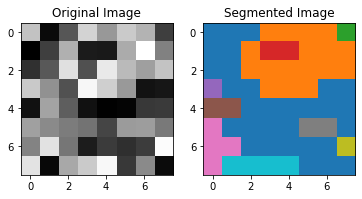

In [5]:


def region_segmentation(image, threshold=0.5):
    rows, cols = image.shape
    visited = np.zeros_like(image)
    segments = []
    
    def dfs(x, y, segment):
        if x < 0 or x >= rows or y < 0 or y >= cols:
            return
        if visited[x, y]:
            return
        if np.abs(image[x, y] - image[segment[0][0], segment[0][1]]) > threshold:
            return
        visited[x, y] = 1
        segment.append((x, y))
        dfs(x-1, y, segment)
        dfs(x+1, y, segment)
        dfs(x, y-1, segment)
        dfs(x, y+1, segment)
    
    for i in range(rows):
        for j in range(cols):
            if visited[i, j]:
                continue
            segment = [(i, j)]
            dfs(i, j, segment)
            segments.append(segment)
    
    return segments

# Create a random 8x8 grayscale image
image = np.random.rand(8, 8)

# Segment the image
segments = region_segmentation(image)

# Plot original image
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

# Plot segmented image
segmented_image = np.zeros_like(image)
for i, segment in enumerate(segments):
    for x, y in segment:
        segmented_image[x, y] = i
plt.subplot(122)
plt.imshow(segmented_image, cmap='tab10')
plt.title('Segmented Image')

plt.show()
